In [1]:
%load_ext autoreload
%autoreload 2

import torch
import experiments.multiclass_classification as exp
from experiments import mnist

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [54]:
batch_size = 128
# LeNet with ReLu
layers = [
    ("conv", (1, 6, 5)),
    ("relu", ()),
    ("pool", 2),
    ("conv", (6, 16, 5)),
    ("relu", ()),
    ("pool", 2),
    ("flatten", ()),
    ("fc", (16 * 4 * 4, 120)),
    ("relu", ()),
    ("fc", (120, 84)),
    ("relu", ()),
    ("fc", (84, 10)),
    ("logsoftmax", ())
]
def sgd(lr):
    return lambda parameters: torch.optim.SGD(parameters, lr)

In [4]:
torch.manual_seed(42)

trainloader = mnist.fashion_trainloader(batch_size)
testloader = mnist.fashion_testloader(batch_size)
corrupted_testloader = mnist.corrupted_fashion_testloader(batch_size)

In [55]:
from training.pp import PointPredictor

torch.manual_seed(42)
pp = PointPredictor(layers)
#pp.train(15, torch.nn.NLLLoss(), sgd(0.01), trainloader, batch_size, device, report_every_epochs=1)
#torch.save(pp.state_dict(), "trained_models/mnist/pp.tar")
pp.load_state_dict(torch.load("trained_models/mnist/pp.tar"))
pp.to(device)

Generated model: Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=256, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)
44426 trainable parameters
Epoch 0: loss 0.014485643245279789
Epoch 1: loss 0.0064905560575425625
Epoch 2: loss 0.005458114668726921
Epoch 3: loss 0.0050117638893425465
Epoch 4: loss 0.004674077499657869
Epoch 5: loss 0.004406980704516172
Epoch 6: loss 0.004206005949527025
Epoch 7: loss 0.004031007178127766
Epoch 8: loss 0.00386476400308311
Epoch 9: loss 0.0037372829392552376
Epoch 10: loss

PointPredictor(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=256, out_features=120, bias=True)
    (8): ReLU()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): LogSoftmax(dim=1)
  )
)

In [43]:
torch.manual_seed(42)
from training.swag import SwagModel
swag_config = {
    "update_every_batches": len(trainloader) // 4,
    "deviation_samples": 20,
    "start_epoch": 10,
    "use_lr_cycles": False,
    "max_lr": 0.01,
    "min_lr": 0.005,
}
swag = SwagModel(layers, swag_config)
#swag.train(15, torch.nn.NLLLoss(), sgd(0.01), trainloader, batch_size, device, report_every_epochs=1)
#torch.save(swag.state_dict(), "trained_models/mnist/swag.tar")
swag.load_state_dict(torch.load("trained_models/mnist/swag.tar"))
swag.to(device)

Generated model: Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=256, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)
44426 trainable parameters
Epoch 0: loss 0.014487897977232933
SWAG: Collected 0 out of 20 deviation samples and 0 parameter samples
Epoch 1: loss 0.006494901143014431
SWAG: Collected 0 out of 20 deviation samples and 0 parameter samples
Epoch 2: loss 0.005457167513668537
SWAG: Collected 0 out of 20 deviation samples and 0 parameter samples
Epoch 3: loss 0.005010556895285845
SWAG: Collected 

SwagModel(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=256, out_features=120, bias=True)
    (8): ReLU()
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ReLU()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): LogSoftmax(dim=1)
  )
)

In [59]:
from training.ensemble import Ensemble

torch.manual_seed(42)
ensemble = Ensemble([PointPredictor(layers) for _ in range(5)])
#ensemble.train(15, torch.nn.NLLLoss(), sgd(0.01), trainloader, batch_size, device)
#torch.save(ensemble.state_dict(), "trained_models/mnist/ensemble.tar")
ensemble.load_state_dict(torch.load("trained_models/mnist/ensemble.tar"))
ensemble.to(device)

Generated model: Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=256, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)
44426 trainable parameters
Generated model: Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_di

Ensemble()

In [40]:
from training.dropout import MonteCarloDropoutModule

torch.manual_seed(42)
mc_dropout = MonteCarloDropoutModule(layers, 0.1)
#mc_dropout.train(15, torch.nn.NLLLoss(), sgd(0.01), trainloader, batch_size, device)
#torch.save(mc_dropout.state_dict(), "trained_models/mnist/mc_dropout.tar")
mc_dropout.load_state_dict(torch.load("trained_models/mnist/mc_dropout.tar"))
mc_dropout.to(device)

Generated model: Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=256, out_features=120, bias=True)
  (8): Dropout(p=0.1, inplace=False)
  (9): ReLU()
  (10): Linear(in_features=120, out_features=84, bias=True)
  (11): Dropout(p=0.1, inplace=False)
  (12): ReLU()
  (13): Linear(in_features=84, out_features=10, bias=True)
  (14): Dropout(p=0.1, inplace=False)
  (15): LogSoftmax(dim=1)
)
44426 trainable parameters


MonteCarloDropoutModule(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=256, out_features=120, bias=True)
    (8): Dropout(p=0.1, inplace=False)
    (9): ReLU()
    (10): Linear(in_features=120, out_features=84, bias=True)
    (11): Dropout(p=0.1, inplace=False)
    (12): ReLU()
    (13): Linear(in_features=84, out_features=10, bias=True)
    (14): Dropout(p=0.1, inplace=False)
    (15): LogSoftmax(dim=1)
  )
)

In [58]:
from training.bbb import GaussianPrior, BBBModel

torch.manual_seed(42)
bbb_prior = GaussianPrior(0, 1)
bbb = BBBModel(bbb_prior, "activations", layers)
#bbb.train(15, torch.nn.NLLLoss(reduction="sum"), sgd(0.01), trainloader, batch_size, device)
#torch.save(bbb.state_dict(), "trained_models/mnist/bbb.tar")
bbb.load_state_dict(torch.load("trained_models/mnist/bbb.tar"))
bbb.to(device)

Generated model: Sequential(
  (0): BBBConvolution()
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): BBBConvolution()
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): BBBLinear()
  (8): ReLU()
  (9): BBBLinear()
  (10): ReLU()
  (11): BBBLinear()
  (12): LogSoftmax(dim=1)
)
88852 trainable parameters
Epoch 0: loss 2.69528865814209
Epoch 1: loss 2.419015884399414
Epoch 2: loss 2.3450145721435547
Epoch 3: loss 2.300830364227295
Epoch 4: loss 2.271714210510254
Epoch 5: loss 2.2511138916015625
Epoch 6: loss 2.234707832336426
Epoch 7: loss 2.221088171005249
Epoch 8: loss 2.209545373916626
Epoch 9: loss 2.199260711669922
Epoch 10: loss 2.1929402351379395
Epoch 11: loss 2.184232234954834
Epoch 12: loss 2.17881441116333
Epoch 13: loss 2.1726138591766357
Epoch 14: loss 2.1673972606658936
Final loss 2.1673972606658936


BBBModel(
  (model): Sequential(
    (0): BBBConvolution()
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BBBConvolution()
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): BBBLinear()
    (8): ReLU()
    (9): BBBLinear()
    (10): ReLU()
    (11): BBBLinear()
    (12): LogSoftmax(dim=1)
  )
)

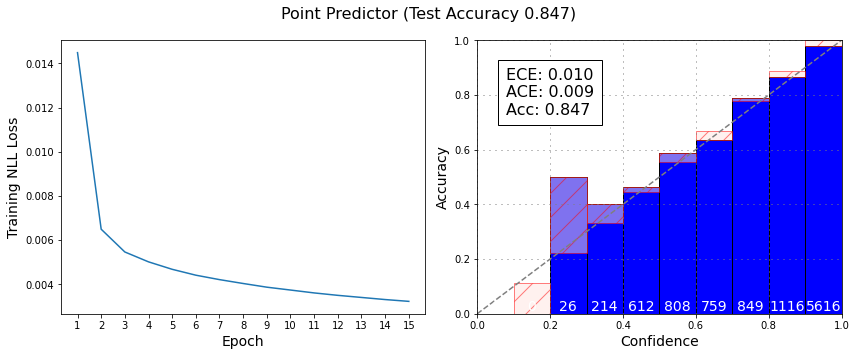

In [44]:
exp.eval_model("Point Predictor", pp.infer, pp.all_losses(), 1, testloader, device).savefig("figures/fmnist_pp_15e.png")

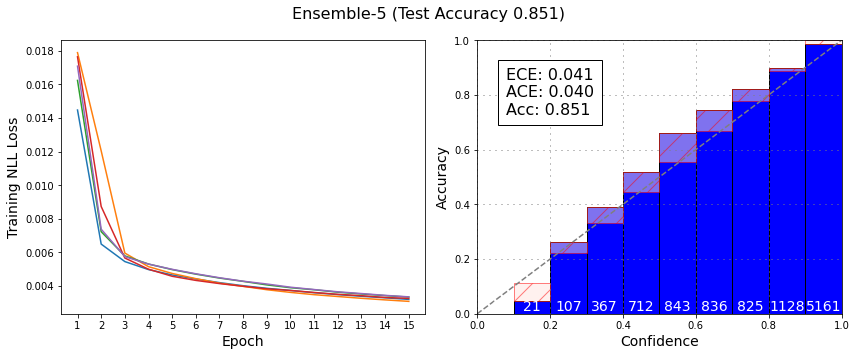

In [60]:
exp.eval_model("Ensemble-5", ensemble.infer, ensemble.all_losses(), 1, testloader, device).savefig("figures/fmnist_ensemble5_15e.png")

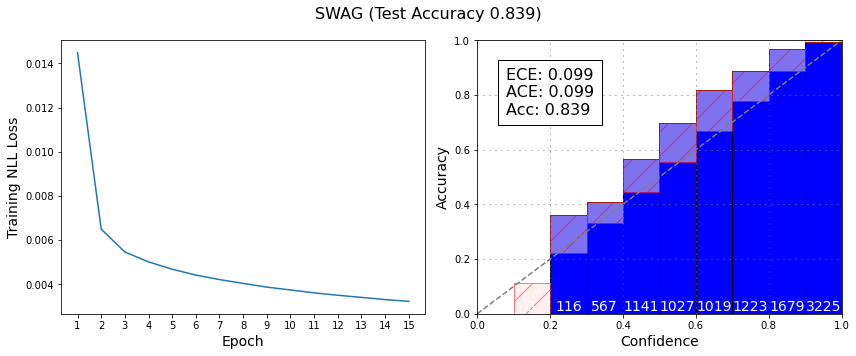

In [45]:
exp.eval_model("SWAG", swag.infer, swag.all_losses(), 100, testloader, device).savefig("figures/fmnist_swag20k_15e.png")

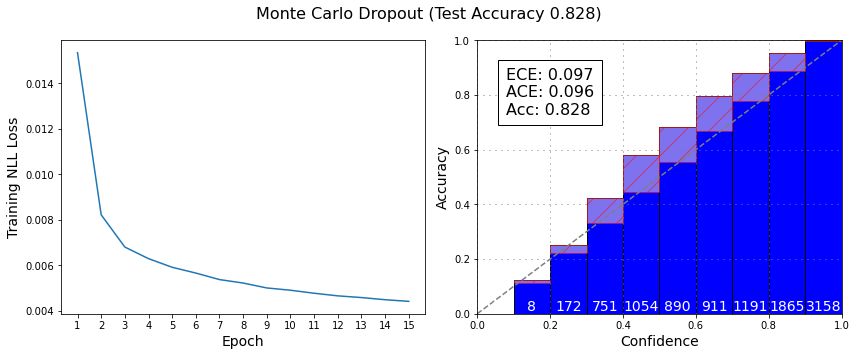

In [41]:
exp.eval_model("Monte Carlo Dropout", mc_dropout.infer, mc_dropout.all_losses(), 100, testloader, device).savefig("figures/fmnist_mcd0.1p_15e.png")

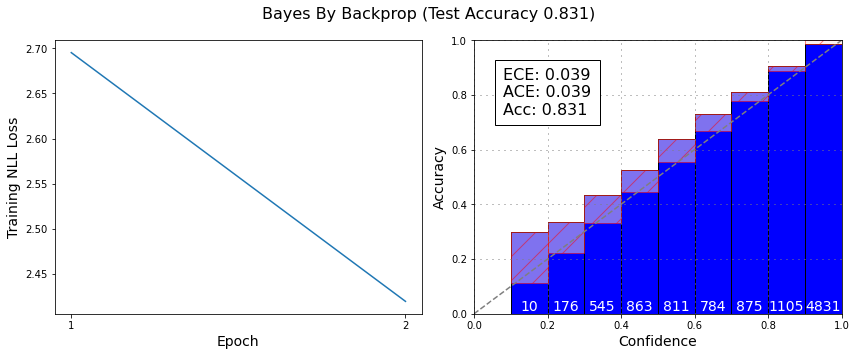

In [28]:
exp.eval_model("Bayes By Backprop", lambda x, s: bbb.infer(x, s), bbb.all_losses(), 100, testloader, device).savefig("figures/fmnist_bbb_15e.png")

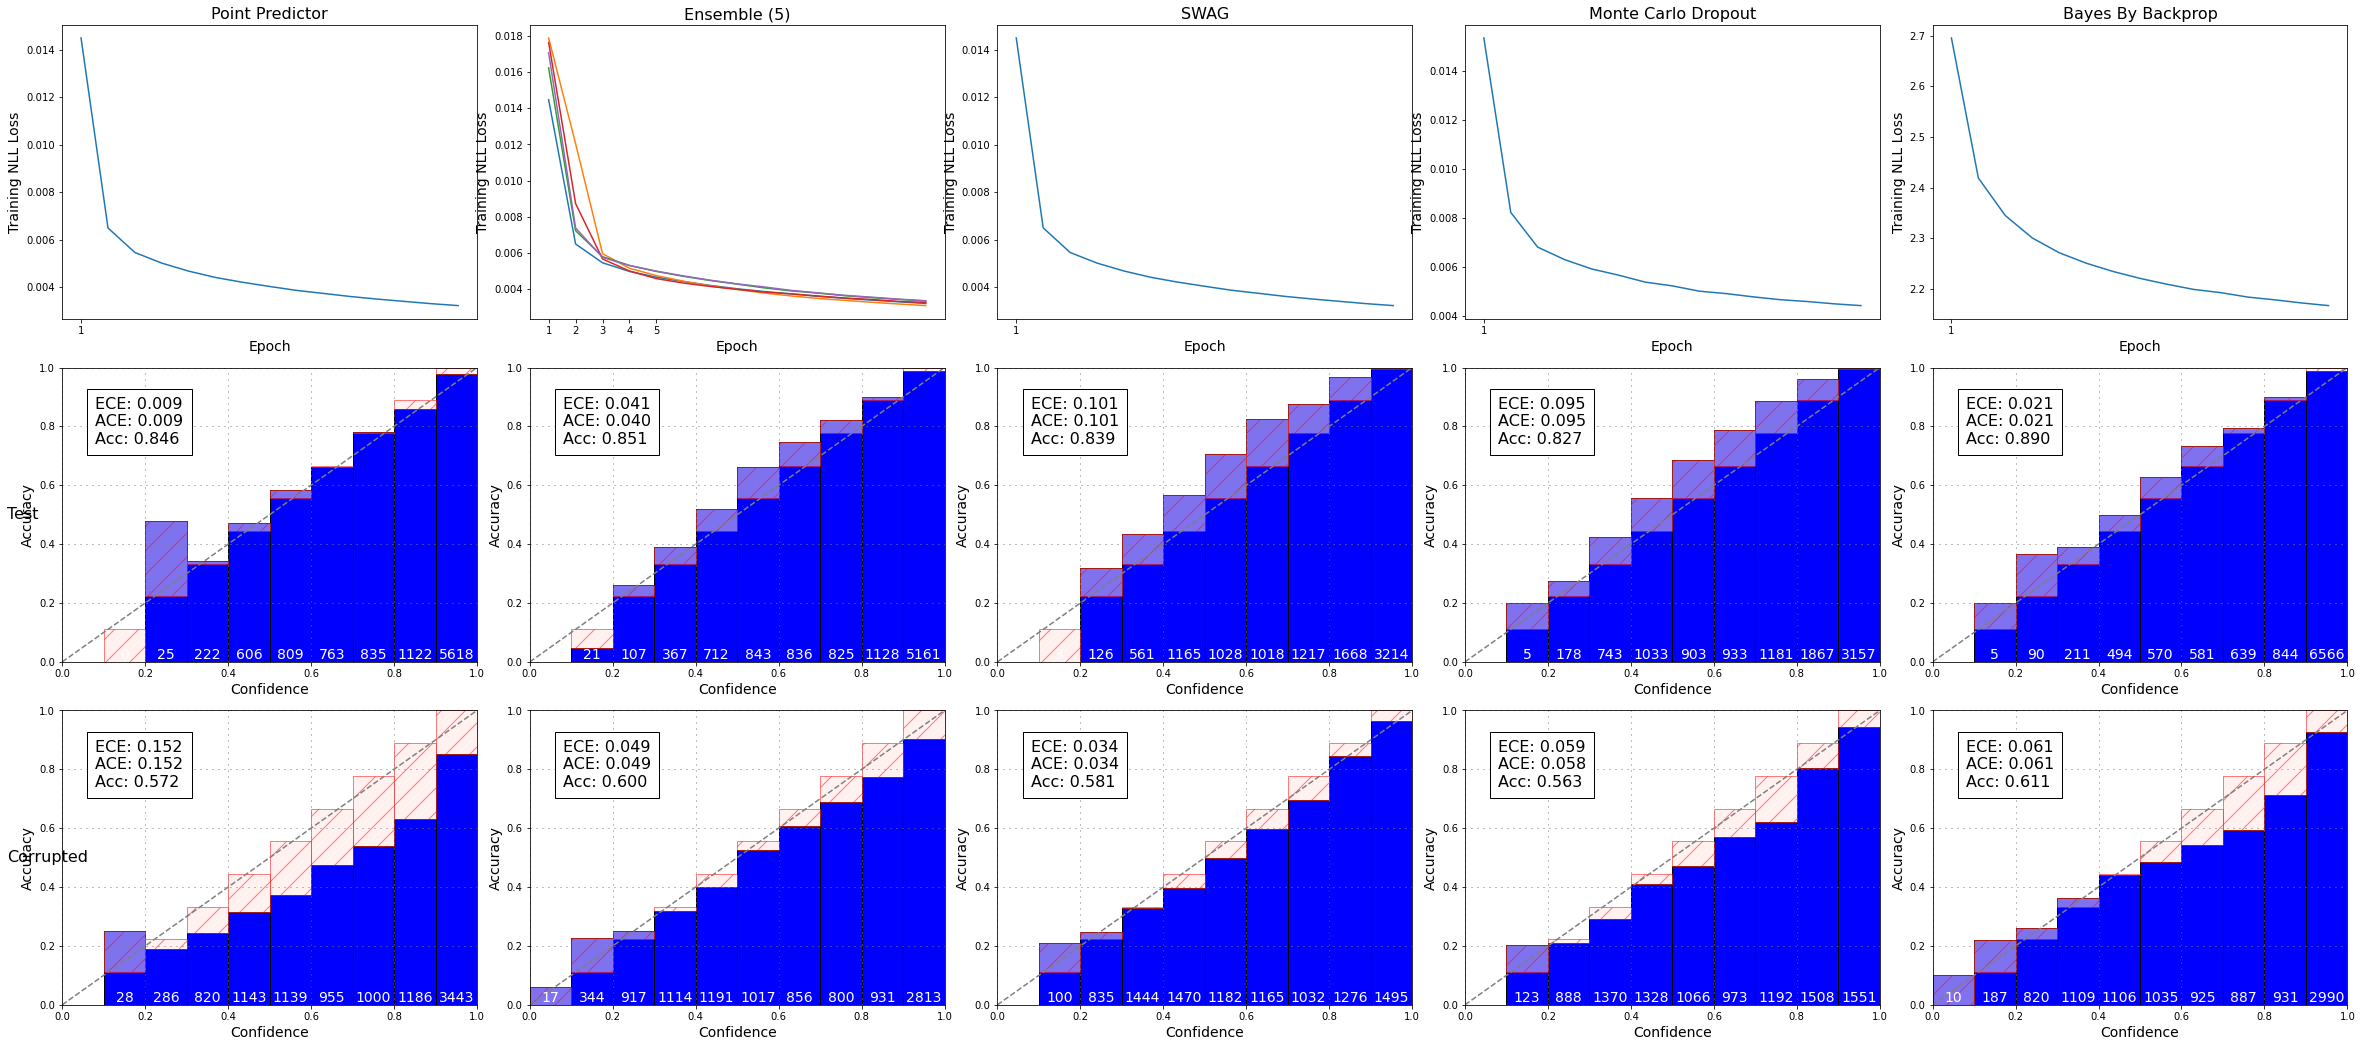

In [61]:
exp.eval_multiple(
    [
        ("Point Predictor", pp.infer, pp.all_losses(), [], 1),
        ("Ensemble (5)", ensemble.infer, ensemble.all_losses(), [], 1),
        ("SWAG", swag.infer, swag.all_losses(), [], 100),
        ("Monte Carlo Dropout", mc_dropout.infer, mc_dropout.all_losses(), [], 100),
        ("Bayes By Backprop", bbb.infer, bbb.all_losses(), [], 100)
    ],
    [
        ("Test", testloader),
        ("Corrupted", corrupted_testloader)
    ],
    device
).savefig("figures/mnist_all.png")